# Time Series Graphs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

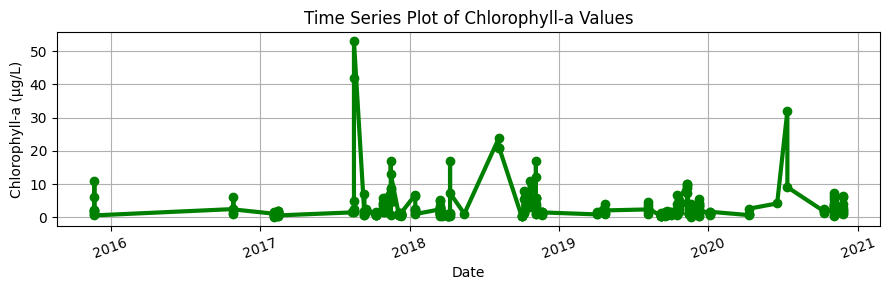

In [5]:
file_path = 'data/df_data_graphing_filter.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

df_data_filter = data.sort_values('Date')

plt.figure(figsize=(9, 3))
plt.plot(data['Date'], data['Chla'], marker='o', color='g', linestyle='-', linewidth=3, markersize=6)
plt.title('Time Series Plot of Chlorophyll-a Values')
plt.xlabel('Date')
plt.ylabel('Chlorophyll-a (µg/L)')
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()

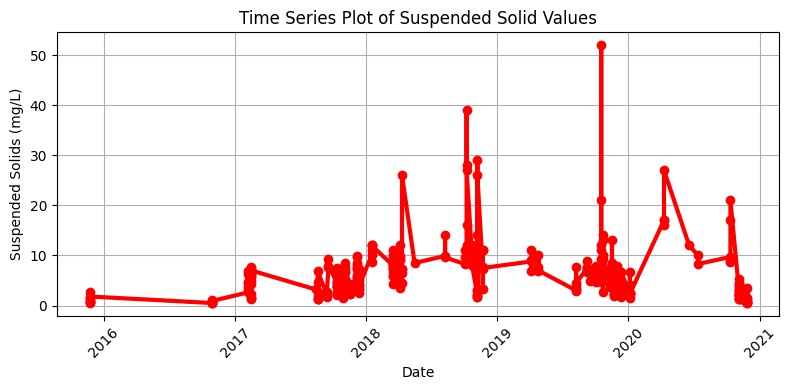

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(data['Date'], data['SS'], marker='o', color='r', linestyle='-', linewidth=3, markersize=6)
plt.title('Time Series Plot of Suspended Solid Values')
plt.xlabel('Date')
plt.ylabel('Suspended Solids (mg/L)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

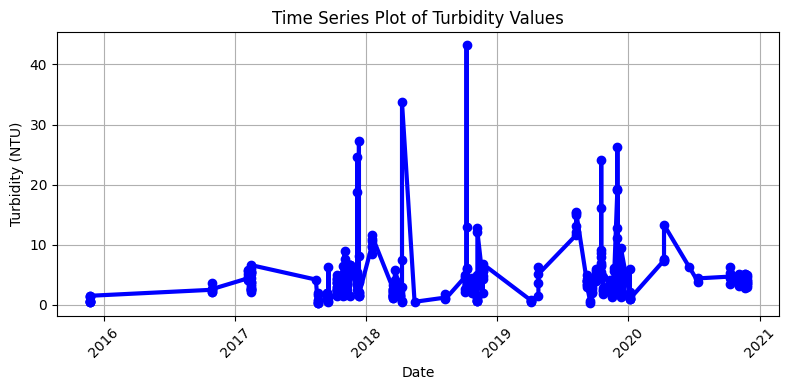

In [28]:
plt.figure(figsize=(8, 4))
plt.plot(data['Date'], data['Tur'], marker='o', color='b', linestyle='-', linewidth=3, markersize=6)
plt.title('Time Series Plot of Turbidity Values')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Prediction Comparison